# Week 9 - Dataset preprocessing

Before we utilize machine learning algorithms we must first prepare our dataset. This can often take a significant amount of time and can have a large impact on the performance of our models.

We will be looking at four different types of data:

* Tabular data
* Image data
* Text


## Tabular data

We will look at three different steps we may need to take when handling tabular data: 

* Missing data
* Normalization
* Categorical data


## Image data

Image data can present a number of issues that we must address to maximize performance:

* Histogram normalization
* Windows
* Pyramids (for detection at different scales)
* Centering



## Text

Text can present a number of issues, mainly due to the number of words that can be found in our features. There are a number of ways we can convert from text to usable features:

* Bag of words
* Parsing

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## Tabular data

* Missing data
* Normalization
* Categorical data

### Missing data

There are a number of ways to handle missing data:

* Drop all records with a value missing
* Substitute all missing values with an average value
* Substitute all missing values with some placeholder value, i.e. 0, 1e9, -1e9, etc
* Predict missing values based on other attributes
* Add additional feature indicating when a value is missing

If the machine learning model will be used with new data it is important to consider the possibility of receiving records with values missing that we have not observed previously in the training dataset.

The simplest approach is to remove any records that have missing data. Unfortunately missing values are often not randomly distributed through a dataset and removing them can introduce bias.

An alternative approach is to substitute the missing values. This can be with the mean of the feature across all the records or the value can be predicted based on the values of the other features in the dataset. Placeholder values can also be used with decision trees but do not work as well for most other algorithms.

Finally, missing values can themselves be useful features. Adding an additional feature indicating when a value is missing is often used to include this information. 

In [3]:
from sklearn import linear_model

x = np.array([[0, 0], [1, 1], [2, 2]])
y = np.array([0, 1, 2])
print(x,y)

clf = linear_model.LinearRegression()
clf.fit(x, y)
print("1. coef", clf.coef_)

x_missing = np.array([[0, 0], [1, np.nan], [2, 2]])
print(x_missing, y)

clf = linear_model.LinearRegression()
clf.fit(x_missing, y)
print(clf.coef_)

[[0 0]
 [1 1]
 [2 2]] [0 1 2]
1. coef [ 0.5  0.5]
[[  0.   0.]
 [  1.  nan]
 [  2.   2.]] [0 1 2]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [14]:
import pandas as pd

x = pd.DataFrame([[0,1,2,3,4,5,6],
                  [2,np.nan,7,4,9,1,3],
                  [0.1,0.12,0.11,0.15,0.16,0.11,0.14],
                  [100,120,np.nan,127,130,121,124],
                  [4,1,7,9,0,2,np.nan]], ).T
x.columns = index=['A', 'B', 'C', 'D', 'E']

y = pd.Series([29.0,
 31.2,
 63.25,
 57.27,
 66.3,
 26.21,
 48.24])

print(x,"\n\n", y, sep="")

   A   B     C    D   E
0  0   2  0.10  100   4
1  1 NaN  0.12  120   1
2  2   7  0.11  NaN   7
3  3   4  0.15  127   9
4  4   9  0.16  130   0
5  5   1  0.11  121   2
6  6   3  0.14  124 NaN

0    29.00
1    31.20
2    63.25
3    57.27
4    66.30
5    26.21
6    48.24
dtype: float64


In [15]:
x.dropna()

,A,B,C,D,E
0,0,2,0.10,100,4
3,3,4,0.15,127,9
4,4,9,0.16,130,0
5,5,1,0.11,121,2


In [18]:
x.fillna(value={'A':100,'B':200,'C':400,'D':600,'E':1200})

,A,B,C,D,E
0,0,2,0.10,100,4
1,1,200,0.12,120,1
2,2,7,0.11,600,7
3,3,4,0.15,127,9
4,4,9,0.16,130,0
5,5,1,0.11,121,2
6,6,3,0.14,124,1200


In [21]:
x.fillna(value=x.mean())

,A,B,C,D,E
0,0,2.000000,0.10,100.000000,4.000000
1,1,4.333333,0.12,120.000000,1.000000
2,2,7.000000,0.11,120.333333,7.000000
3,3,4.000000,0.15,127.000000,9.000000
4,4,9.000000,0.16,130.000000,0.000000
5,5,1.000000,0.11,121.000000,2.000000
6,6,3.000000,0.14,124.000000,3.833333


### Normalization

Many machine learning algorithms expect features to have similar distributions and scales.

A classic example is gradient descent, if features are on different scales some weights will update faster than others because the feature values scale the weight updates.

There are two common approaches to normalization:

* Z-score standardization
* Min-max scaling

#### Z-score standardization

Z-score standardization rescales values so that they have a mean of zero and a standard deviation of 1. Specifically we perform the following transformation:

$$z = \frac{x - \mu}{\sigma}$$

#### Min-max scaling

An alternative is min-max scaling that transforms data into the range of 0 to 1. Specifically:

$$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

Min-max scaling is less commonly used but can be useful for image data and in some neural networks.

In [22]:
x_filled = x.fillna(value=x.mean())

print(x_filled)

   A         B     C           D         E
0  0  2.000000  0.10  100.000000  4.000000
1  1  4.333333  0.12  120.000000  1.000000
2  2  7.000000  0.11  120.333333  7.000000
3  3  4.000000  0.15  127.000000  9.000000
4  4  9.000000  0.16  130.000000  0.000000
5  5  1.000000  0.11  121.000000  2.000000
6  6  3.000000  0.14  124.000000  3.833333


In [23]:
x_norm = (x_filled - x_filled.min()) / (x_filled.max() - x_filled.min())

print(x_norm)

          A         B         C         D         E
0  0.000000  0.125000  0.000000  0.000000  0.444444
1  0.166667  0.416667  0.333333  0.666667  0.111111
2  0.333333  0.750000  0.166667  0.677778  0.777778
3  0.500000  0.375000  0.833333  0.900000  1.000000
4  0.666667  1.000000  1.000000  1.000000  0.000000
5  0.833333  0.000000  0.166667  0.700000  0.222222
6  1.000000  0.250000  0.666667  0.800000  0.425926


In [24]:
from sklearn import preprocessing

scaling = preprocessing.MinMaxScaler().fit(x_filled)
scaling.transform(x_filled)

array([[ 0.        ,  0.125     ,  0.        ,  0.        ,  0.44444444],
       [ 0.16666667,  0.41666667,  0.33333333,  0.66666667,  0.11111111],
       [ 0.33333333,  0.75      ,  0.16666667,  0.67777778,  0.77777778],
       [ 0.5       ,  0.375     ,  0.83333333,  0.9       ,  1.        ],
       [ 0.66666667,  1.        ,  1.        ,  1.        ,  0.        ],
       [ 0.83333333,  0.        ,  0.16666667,  0.7       ,  0.22222222],
       [ 1.        ,  0.25      ,  0.66666667,  0.8       ,  0.42592593]])

### Categorical data

Categorical data can take one of a number of possible values. The different categories may be related to each other or be largely independent and unordered.

Continuous variables can be converted to categorical variables by applying a threshold.

In [36]:
x = pd.DataFrame([[0,1,2,3,4,5,6],
                  [2,np.nan,7,4,9,1,3],
                  [0.1,0.12,0.11,0.15,0.16,0.11,0.14],
                  [100,120,np.nan,127,130,121,124],
                  ['Green','Red','Blue','Blue','Green','Red','Green']], ).T
x.columns = index=['A', 'B', 'C', 'D', 'E']

print(x)

   A    B     C    D      E
0  0    2   0.1  100  Green
1  1  NaN  0.12  120    Red
2  2    7  0.11  NaN   Blue
3  3    4  0.15  127   Blue
4  4    9  0.16  130  Green
5  5    1  0.11  121    Red
6  6    3  0.14  124  Green


In [26]:
x_cat = x.copy()

for val in x['E'].unique():
    x_cat['E_{0}'.format(val)] = x_cat['E'] == val

x_cat

,A,B,C,D,E,E_Green,E_Red,E_Blue
0,0,2,0.1,100,Green,True,False,False
1,1,NaN,0.12,120,Red,False,True,False
2,2,7,0.11,NaN,Blue,False,False,True
3,3,4,0.15,127,Blue,False,False,True
4,4,9,0.16,130,Green,True,False,False
5,5,1,0.11,121,Red,False,True,False
6,6,3,0.14,124,Green,True,False,False


### Exercises

1. Substitute missing values in `x` with the column mean and add an additional column to indicate when missing values have been substituted. The `isnull` method on the pandas dataframe may be useful.
2. Convert `x` to the z-scaled values. The StandardScaler method in the preprocessing module can be used or the z-scaled values calculated directly.
3. Convert `x['C']` into a categorical variable using a threshold of 0.125 

In [44]:
# Exercise 1
print(x)
x_ex1 = x.copy()
x_ex1['is_NA'] = x_ex1.isnull().sum(axis=1)

x_ex1 = x_ex1.fillna(value={'B':x_ex1['B'].mean(),'D':x_ex1['D'].mean()})

print(x_ex1)

   A    B     C    D      E
0  0    2   0.1  100  Green
1  1  NaN  0.12  120    Red
2  2    7  0.11  NaN   Blue
3  3    4  0.15  127   Blue
4  4    9  0.16  130  Green
5  5    1  0.11  121    Red
6  6    3  0.14  124  Green
   A         B     C           D      E  is_NA
0  0  2.000000   0.1  100.000000  Green      0
1  1  4.333333  0.12  120.000000    Red      1
2  2  7.000000  0.11  120.333333   Blue      1
3  3  4.000000  0.15  127.000000   Blue      0
4  4  9.000000  0.16  130.000000  Green      0
5  5  1.000000  0.11  121.000000    Red      0
6  6  3.000000  0.14  124.000000  Green      0


In [67]:
# Exercise 2
print(x)
x_ex2 = x.copy()
# remove categorical variables 
for val in x_ex2['E'].unique():
    x_ex2['E_{0}'.format(val)] = x_ex2['E'] == val

x_ex2 = x_ex2.drop('E',1)

# replace missing values
x_ex2 = x_ex2.fillna(value={'B':x_ex2['B'].mean(),'D':x_ex2['D'].mean()})

print(x_ex2)

from sklearn import preprocessing

scale = preprocessing.StandardScaler().fit(x_ex2)
x_ex2_s = scale.transform(x_ex2)

print(x_ex2_s)
x_ex2_s.mean(axis=0) # column means close to zero
x_ex2_s.std(axis=0) # standard deviations at 1

   A    B     C    D      E
0  0    2   0.1  100  Green
1  1  NaN  0.12  120    Red
2  2    7  0.11  NaN   Blue
3  3    4  0.15  127   Blue
4  4    9  0.16  130  Green
5  5    1  0.11  121    Red
6  6    3  0.14  124  Green
   A         B     C           D E_Green  E_Red E_Blue
0  0  2.000000   0.1  100.000000    True  False  False
1  1  4.333333  0.12  120.000000   False   True  False
2  2  7.000000  0.11  120.333333   False  False   True
3  3  4.000000  0.15  127.000000   False  False   True
4  4  9.000000  0.16  130.000000    True  False  False
5  5  1.000000  0.11  121.000000   False   True  False
6  6  3.000000  0.14  124.000000    True  False  False
[[-1.5        -0.89730949 -1.28097974 -2.26258708  1.15470054 -0.63245553
  -0.63245553]
 [-1.          0.         -0.33709993 -0.03709159 -0.8660254   1.58113883
  -0.63245553]
 [-0.5         1.02549656 -0.80903983  0.         -0.8660254  -0.63245553
   1.58113883]
 [ 0.         -0.12818707  1.07871978  0.74183183 -0.8660254  -0.6324

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [60]:
# Exercise 3
x_ex3 = x.copy()
# set threshold for 'C' at 0.125
x_ex3['C'] = x_ex3['C'] > 0.125
    
print(x_ex3)

   A    B      C    D      E
0  0    2  False  100  Green
1  1  NaN  False  120    Red
2  2    7  False  NaN   Blue
3  3    4   True  127   Blue
4  4    9   True  130  Green
5  5    1  False  121    Red
6  6    3   True  124  Green


## Image data

Depending on the type of task being performed there are a variety of steps we may want to take in working with images:

* Histogram normalization
* Windows and pyramids (for detection at different scales)
* Centering

Occasionally the camera used to generate an image will use 10- to 14-bits while a 16-bit file format will be used. In this situation all the pixel intensities will be in the lower values. Rescaling to the full range (or to 0-1) can be useful.

Further processing can be done to alter the histogram of the image.


When looking for particular features in an image a sliding window can be used to check different locations. This can be combined with an image pyramid to detect features at different scales. This is often needed when objects can be at different distances from the camera.


If objects are sparsely distributed in an image a faster approach than using sliding windows is to identify objects with a simple threshold and then test only the bounding boxes containing objects. Before running these through a model centering based on intensity can be a useful approach. Small offsets, rotations and skewing can be used to generate additional training data.

C:\Anaconda3\envs\py35\lib\site-packages\skimage\exposure\_adapthist.py:262: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 256 but corresponding boolean dimension is 13
  hist[under] += 1
C:\Anaconda3\envs\py35\lib\site-packages\skimage\exposure\_adapthist.py:263: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 256 but corresponding boolean dimension is 13
  n_excess -= hist[under].size
C:\Anaconda3\envs\py35\lib\site-packages\skimage\exposure\_adapthist.py:262: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 256 but corresponding boolean dimension is 37
  hist[under] += 1
C:\Anaconda3\envs\py35\lib\site-packages\skimage\exposure\_adapthist.py:263: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 256 but corresponding boolean dimension is 37
  n_excess -= hist[under].size
C:\A

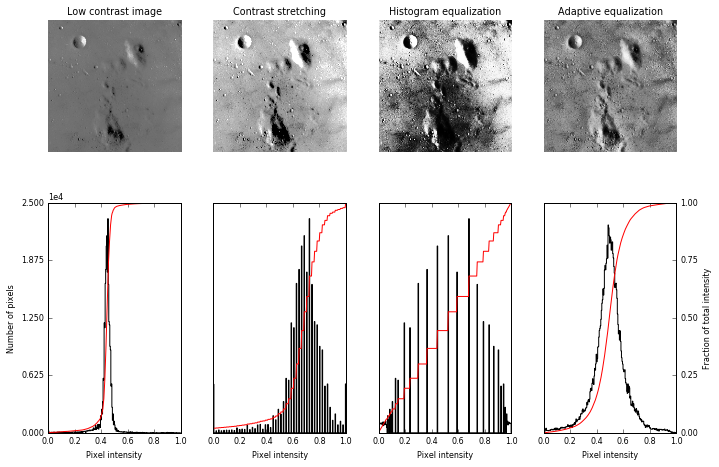

In [3]:
# http://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_equalize.html#example-color-exposure-plot-equalize-py

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    img = img_as_float(img)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(10, 7))
axes = np.zeros((2,4), dtype=np.object)
axes[0,0] = fig.add_subplot(2, 4, 1)
for i in range(1,4):
    axes[0,i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0,4):
    axes[1,i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

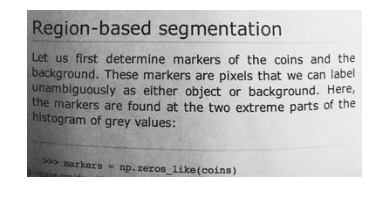

(191, 384)


In [66]:
from sklearn.feature_extraction import image

img = data.page()
fig, ax = plt.subplots(1,1)
ax.imshow(img, cmap=plt.cm.gray)
ax.set_axis_off()
plt.show()
print(img.shape)

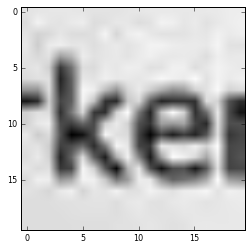

In [67]:
patches = image.extract_patches_2d(img, (20, 20), max_patches=2, random_state=0)
patches.shape
plt.imshow(patches[0], cmap=plt.cm.gray)
plt.show()

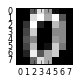

In [23]:
from sklearn import datasets
digits = datasets.load_digits()
#print(digits.DESCR)
fig, ax = plt.subplots(1,1, figsize=(1,1))
ax.imshow(digits.data[0].reshape((8,8)), cmap=plt.cm.gray, interpolation='nearest')

## Text

When working with text the simplest approach is known as bag of words. In this approach we simply count the number of instances of each word, and then adjust the values based on how commonly the word is used.

The first task is to break a piece of text up into individual tokens. The number of occurrences of each word is then recorded. More rarely used words are likely to be more interesting and so word counts are scaled by the inverse document frequency.

We can extend this to look at not just individual words but also bigrams and trigrams.

In [87]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train',
    categories=['comp.graphics', 'sci.med'], shuffle=True, random_state=0)

print(twenty_train.target_names)

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
print(X_train_counts.shape)

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape, X_train_tfidf[:5,:15].toarray())

['comp.graphics', 'sci.med']
(1178, 24614)
(1178, 24614) [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [88]:
print(twenty_train.data[0])

From: harti@mikro.ee.tu-berlin.de (Stefan Hartmann (Behse))
Subject: Genoa graphics board Drivers FTP site!
Article-I.D.: mailgzrz.1qpf1r$9ti
Organization: TUBerlin/ZRZ
Lines: 29
NNTP-Posting-Host: mikro.ee.tu-berlin.de

Hi,

well I have opened up a FTP site for getting the latest software drivers
for Genoa graphics cards.

Here is how to access it:

ftp 192.109.42.11
login:ftp
password:ftp
cd pub/genoa
ls -l
binary
prompt
hash

(now if you wanna have the latest drivers for the 7900 board)

cd 7000series
mget *

quit

This is the sequence to get the drivers.

If you have any further question, please email me.

Best regards, Stefan Hartmann
email to: harti@mikro.ee.tu-berlin.de



In [89]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data[0:1])
print(X_train_counts[0].toarray())
print(count_vect.vocabulary_.keys())


[[1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 2 1 2 3 4 3 2 3 1 5 1 3 1 1 2 2 2 1 3 1 1
  1 1 2 2 1 2 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 5 1 3 3 1 1 1
  1 2 1]]
dict_keys(['nntp', 'is', 'me', '7000series', 'to', 'it', 'mikro', 'subject', 'de', 'regards', 'from', 'lines', '109', 'hi', 'cards', 'organization', 'board', 'software', 'have', 'hartmann', '7900', 'for', 'drivers', 'article', 'best', '9ti', '1qpf1r', '11', 'genoa', 'mget', 'please', 'ftp', 'any', '192', 'latest', 'further', 'tu', 'stefan', 'ee', 'sequence', 'here', 'zrz', 'password', 'if', 'host', 'the', 'mailgzrz', 'pub', 'this', '29', 'site', 'cd', 'wanna', 'now', 'well', 'hash', 'tuberlin', 'berlin', 'question', 'binary', 'posting', 'access', 'getting', 'up', 'quit', 'prompt', 'login', 'email', 'you', 'graphics', 'opened', 'ls', 'how', 'behse', 'get', 'harti', '42'])


## Exercises

1. Choose one of the histogram prcessing methods and apply it to the page example.
2. Take patches for the page example used above at different scales (10, 20 and 40 pixels). The resulting patches should be [rescaled](http://scikit-image.org/docs/stable/api/skimage.transform.html#rescale) to have the same size.
3. Change the vectorization approach to ignore very common words such as 'the' and 'a'. These are known as stop words. Reading the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) should help.
4. Change the vectorization approach to consider both single words and sequences of 2 words. Reading the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) should help.

C:\Anaconda3\envs\py35\lib\site-packages\skimage\exposure\_adapthist.py:262: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 256 but corresponding boolean dimension is 86
  hist[under] += 1
C:\Anaconda3\envs\py35\lib\site-packages\skimage\exposure\_adapthist.py:263: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 256 but corresponding boolean dimension is 86
  n_excess -= hist[under].size
C:\Anaconda3\envs\py35\lib\site-packages\skimage\exposure\_adapthist.py:262: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 256 but corresponding boolean dimension is 128
  hist[under] += 1
C:\Anaconda3\envs\py35\lib\site-packages\skimage\exposure\_adapthist.py:263: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 256 but corresponding boolean dimension is 128
  n_excess -= hist[under].size
C:

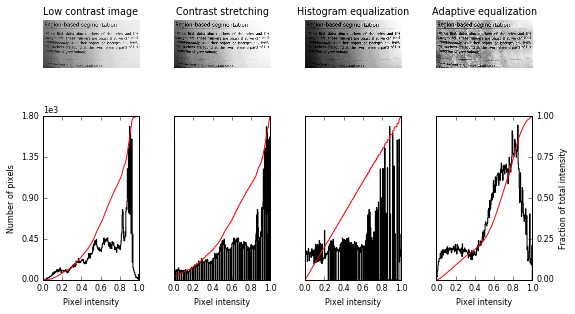

In [5]:
# Exercise 1

from sklearn.feature_extraction import image

img = data.page()
# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2,4), dtype=np.object)
axes[0,0] = fig.add_subplot(2, 4, 1)
for i in range(1,4):
    axes[0,i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0,4):
    axes[1,i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

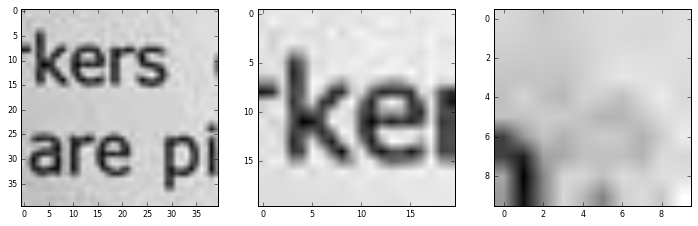

In [9]:
# Exercise 2
from skimage.transform import resize

fig = plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
patches = image.extract_patches_2d(img, (40, 40), max_patches=2, random_state=0)
patches.shape
resize(patches, (200,200))
plt.imshow(patches[0], cmap=plt.cm.gray)

plt.subplot(1,3,2)
patches2 = image.extract_patches_2d(img, (20, 20), max_patches=2, random_state=0)
patches2.shape
resize(patches2, (200,200))
plt.imshow(patches2[0], cmap=plt.cm.gray)

plt.subplot(1,3,3)
patches3 = image.extract_patches_2d(img, (10, 10), max_patches=2, random_state=0)
patches3.shape
resize(patches3, (200,200))
plt.imshow(patches3[0], cmap=plt.cm.gray)

plt.show()

In [90]:
# Exercise 3
count_vect = CountVectorizer(stop_words=("the", "a"))
X_train_counts = count_vect.fit_transform(twenty_train.data[0:1])
print(X_train_counts[0].toarray())
print(count_vect.vocabulary_.keys())

[[1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 2 1 2 3 4 3 2 3 1 5 1 3 1 1 2 2 2 1 3 1 1
  1 1 2 2 1 2 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 3 3 1 1 1 1
  2 1]]
dict_keys(['nntp', 'is', 'me', '7000series', 'to', 'it', 'mikro', 'subject', 'de', 'regards', 'from', 'lines', '109', 'hi', 'cards', 'organization', 'board', 'software', 'have', 'hartmann', '7900', 'for', 'drivers', 'article', 'best', '9ti', '1qpf1r', '11', 'genoa', 'mget', 'please', 'ftp', 'any', '192', 'latest', 'further', 'tu', 'stefan', 'ee', 'sequence', 'here', 'zrz', 'password', 'if', 'host', 'mailgzrz', 'pub', 'this', '29', 'site', 'cd', 'wanna', 'now', 'well', 'hash', 'tuberlin', 'berlin', 'question', 'binary', 'posting', 'access', 'getting', 'up', 'quit', 'prompt', 'login', 'email', 'you', 'graphics', 'opened', 'ls', 'how', 'behse', 'get', 'harti', '42'])


In [91]:
# Exercise 4
count_vect = CountVectorizer(stop_words=("the", "a"), ngram_range=(1,2))
X_train_counts = count_vect.fit_transform(twenty_train.data[0:1])
print(X_train_counts[0].toarray())
print(count_vect.vocabulary_.keys())


[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 1 1 2 1 1 1 1
  2 1 1 3 1 1 4 2 1 1 3 3 2 1 1 3 1 1 1 1 1 5 1 1 1 2 1 1 3 2 1 1 1 1 1 2 1
  1 2 2 2 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
  1 2 2 1 1 1 1 3 1 1 1 3 3 1 1 1 1 1 1 1 1 2 1 1 1 1]]
dict_keys(['nntp', 'to', 'is', 'it', 'graphics cards', 'email to', 'is how', 'subject', 'get drivers', 'me best', 'board drivers', 'regards', 'from', '7000series', 'hi', 'cd pub', 'to access', 'board', 'tuberlin zrz', 'harti mikro', 'to get', 'drivers', '7900', 'access it', 'further question', '1qpf1r', '11', 'host mikro', 'have latest', 'mget', 'further', '1qpf1r 9ti', 'it ftp', 'for 7900', 'genoa', 'stefan', 'sequence', 'zrz', 'password', 'if', 'best regards', 'mailgzrz', 'hash now', 'this', '29', 'site', 'cd', 'wanna', 'wanna have', 'article mailgzrz', 'now', 'opened up', 'nntp posting', 'berlin', 'question', '109 42', 'tu berlin